In [8]:
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np
import argparse
import cv2
from matplotlib import pyplot as plt
import matplotlib.path as mplPath

In [2]:
def segment_colorfulness(image, mask):
    # split the image into its respective RGB components, then mask
    # each of the individual RGB channels so we can compute
    # statistics only for the masked region
    (B, G, R) = cv2.split(image.astype("float"))
    R = np.ma.masked_array(R, mask=mask)
    G = np.ma.masked_array(B, mask=mask)
    B = np.ma.masked_array(B, mask=mask)
 
    # compute rg = R - G
    rg = np.absolute(R - G)
 
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
 
    # compute the mean and standard deviation of both `rg` and `yb`,
    # then combine them
    stdRoot = np.sqrt((rg.std() ** 2) + (yb.std() ** 2))
    meanRoot = np.sqrt((rg.mean() ** 2) + (yb.mean() ** 2))
 
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

In [3]:
# load the image in OpenCV format so we can draw on it later, then
# allocate memory for the superpixel colorfulness visualization
orig = cv2.imread('parzivalDataset/d-006.jpg')
vis = np.zeros(orig.shape[:2], dtype="float")

# load the image and apply SLIC superpixel segmentation to it via
# scikit-image
image = io.imread('parzivalDataset/d-006.jpg')
segments = slic(img_as_float(image), n_segments=100,
    slic_zero=True)

In [4]:
# loop over each of the unique superpixels
for v in np.unique(segments):
    # construct a mask for the segment so we can compute image
    # statistics for *only* the masked region
    mask = np.ones(image.shape[:2])
    mask[segments == v] = 0

    # compute the superpixel colorfulness, then update the
    # visualization array
    C = segment_colorfulness(orig, mask)
    vis[segments == v] = C

In [5]:
# scale the visualization image from an unrestricted floating point
# to unsigned 8-bit integer array so we can use it with OpenCV and
# display it to our screen
vis = rescale_intensity(vis, out_range=(0, 255)).astype("uint8")

# overlay the superpixel colorfulness visualization on the original
# image
alpha = 0.6
overlay = np.dstack([vis] * 3)
output = orig.copy()
cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

array([[[143, 149, 173],
        [142, 148, 173],
        [141, 147, 172],
        ..., 
        [ 33,  27,  26],
        [ 33,  27,  27],
        [ 34,  28,  27]],

       [[142, 149, 174],
        [142, 149, 173],
        [141, 147, 172],
        ..., 
        [ 32,  26,  26],
        [ 33,  27,  26],
        [ 33,  27,  26]],

       [[143, 149, 175],
        [142, 149, 174],
        [141, 148, 173],
        ..., 
        [ 32,  26,  26],
        [ 32,  26,  26],
        [ 32,  26,  26]],

       ..., 
       [[ 98,  97, 105],
        [ 99,  98, 105],
        [ 99,  99, 105],
        ..., 
        [156, 154, 153],
        [156, 154, 153],
        [156, 154, 153]],

       [[102, 101, 109],
        [103, 102, 109],
        [104, 102, 110],
        ..., 
        [156, 154, 153],
        [156, 154, 153],
        [156, 154, 153]],

       [[101, 100, 107],
        [102, 101, 109],
        [104, 103, 110],
        ..., 
        [156, 154, 153],
        [156, 154, 153],
        [155, 154,

In [13]:
def subplot(titles, images, rows, imgPerRows, size):
    fig, ax = plt.subplots(figsize=(size,size))
    for i in range(len(images)):
        plt.subplot(rows,imgPerRows,i+1),
        #plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([]),
        plt.yticks([])
    plt.show()

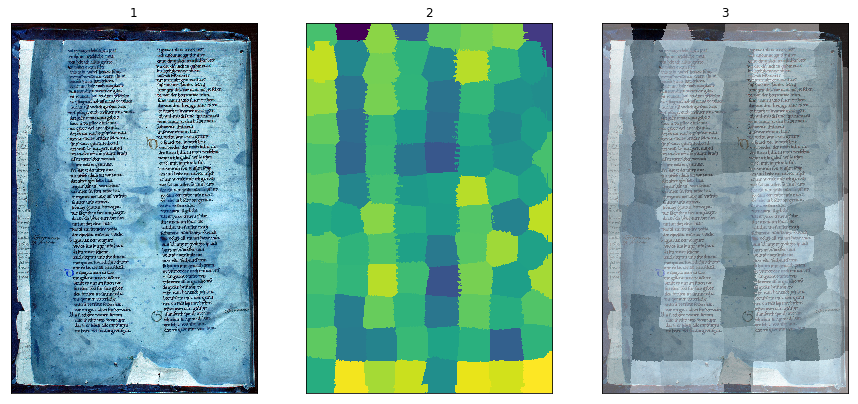

In [15]:
titles = ['1','2','3']
images = [orig, vis, output]
subplot (titles, images, 1, 3, 15)